# Customer shopping

## Librearías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## Funciones utiles

### Gráficas

In [3]:
def box_plot(df: pd.DataFrame,
             title: str,
             savefig: bool = False,
             showfliers: bool = True):
    """Genera un diagrama de cajas utilizando el mapa de colores RdYlGn.

    Args:
        df (pd.DataFrame): El DataFrame que se utilizará para generar 
         el diagrama de cajas.
         title: Título de la gráfica.
        savefig: Opcional. Si se quiere guardar la imagen 
         en output.
        showfliers (bool): Indica si se muestran o no los valores 
         atípicos en el diagrama de cajas. Valor predeterminado es True.

    Returns:
        None: Muestra el gráfico de barras.
        
    """
    # Generar el diagrama de cajas utilizando df.plot(kind='box')
    ax = df.plot(kind='box', patch_artist=True, figsize=(8, 5), showfliers=showfliers, vert=False)
    
    # Configurar el mapa de colores
    cmap = plt.cm.RdYlGn
    
    # Personalizar el color de las cajas utilizando el mapa de colores
    for patch, color in zip(ax.artists, cmap(np.linspace(0.1, 0.9, len(ax.artists)))):
        patch.set_facecolor(color)
        
    # Agregar título
    plt.title(title)
    
    # Guardar la figura si savefig es True y se proporciona una ruta
    if savefig:
        plt.savefig(os.path.join('..', 'output', f'{title}.png'), bbox_inches='tight')

    plt.show()

In [4]:
def pie_plot(data: pd.DataFrame, 
             col: str,
             title: str,
             savefig: bool = False) -> None:
    """Genera un gráfico de torta basado en una columna de un DataFrame.

    Args:
        data (pd.DataFrame): El DataFrame que contiene los datos.
        col (str): El nombre de la columna a graficar.
        title: Título de la gráfica.
        savefig: Opcional. Si se quiere guardar la imagen 
         en output.

    Returns:
        None: Muestra el gráfico de pastel.

    """
    plt.figure(figsize=(8, 5))
    datos = data[col]
    labels = data.index
    
    # Se agregan colores con plt.cm estableciendo un color para cada espacio en el 
    # diagrama, por eso se usa un linspace de la misma magnitud de los datos.
    colors = plt.cm.RdYlGn(np.linspace(0.1, 0.7, len(datos)))
    
    # Generación del diagrama circular
    patches, texts = plt.pie(datos, labels=labels, colors=colors)

    # Para que siempre se vea como un círculo
    plt.axis('equal')
    
    # Se eliminan las líneas
    plt.rcParams['patch.linewidth'] = 0
    
    # Estimación porcentaje
    porcent = 100 * datos / sum(datos)
    # Lista que será expuesta en la legenda
    labels = ['{0} - {1:1.1f} %'.format(i,j) for i, j in zip(labels, porcent)]
    
    # Se genera la legenda
    # bbox_to_anchor especifica en coordenadas la posición de la legenda
    plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=8)
    
    # Agregar título
    plt.title(title)
    
    # Guardar la figura si savefig es True y se proporciona una ruta
    if savefig:
        plt.savefig(os.path.join('..', 'output', f'{title}.png'), bbox_inches='tight')
        
    plt.show()

### Limpieza

In [5]:
def find_missing(df: pd.DataFrame) -> pd.DataFrame:
    """Encuentra los valores faltantes en un DataFrame y devuelve un nuevo DataFrame
     que muestra la cantidad de valores faltantes y el porcentaje correspondiente.

    Args:
        df (pd.DataFrame): El DataFrame que se va a analizar.

    Returns:
        pd.DataFrame: Un nuevo DataFrame que muestra las columnas, la cantidad de
        valores faltantes y el porcentaje de valores faltantes para cada columna.

    """
    lista = []
    for col in df.columns:
        num = df[df[col].isnull()].shape[0]
        lista.append(num)
    
    dic = {
        'Columnas': df.columns,
        'Faltantes': lista}
    df_faltantes = pd.DataFrame(dic)
    
    df_faltantes['Porcentaje'] = df_faltantes['Faltantes'] / df.shape[0]
    
    return df_faltantes

# Procesamiento

## Carga de datos

In [6]:
path = os.path.join('data', 'customer_shopping_data.csv')
shopping_data = pd.read_csv(path)

## Imputación de datos

In [7]:
missing_values = find_missing(shopping_data)

In [8]:
missing_values

,Columnas,Faltantes,Porcentaje
0,invoice_no,0,0.0
1,customer_id,0,0.0
2,gender,0,0.0
3,age,0,0.0
4,category,0,0.0
5,quantity,0,0.0
6,price,0,0.0
7,payment_method,0,0.0
8,invoice_date,0,0.0
9,shopping_mall,0,0.0


* No se realiza imputación de datos debido a que no se encuentran datos faltantes

In [9]:
shopping_categorical = shopping_data.select_dtypes(include=['object'])
shopping_numeric = shopping_data.select_dtypes(include=[np.number])

## Datos atípicos

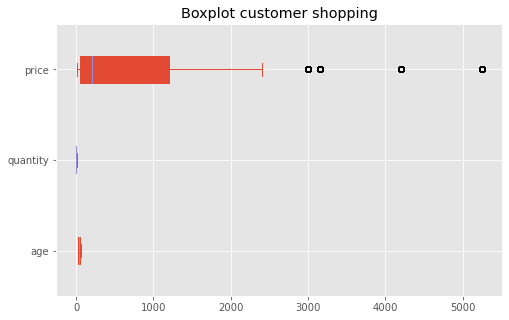

In [10]:
box_plot(
    df=shopping_numeric,
    title='Boxplot customer shopping',
    savefig=True)

In [11]:
# Normalización de los datos
min_max = MinMaxScaler()

numeric_scale = min_max.fit_transform(shopping_numeric)

numeric_scale = pd.DataFrame(numeric_scale, columns=shopping_numeric.columns)

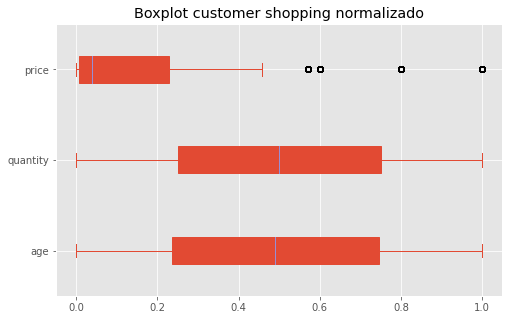

In [12]:
box_plot(
    df=numeric_scale,
    title='Boxplot customer shopping normalizado',
    savefig=True)

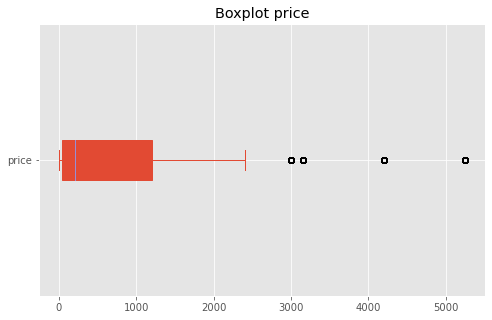

In [13]:
box_plot(
    df=shopping_data['price'],
    title='Boxplot price',
    savefig=True)

In [14]:
shopping_data = shopping_data.sort_values(by='price', ascending=False)

In [15]:
shopping_data.groupby('price').agg({'invoice_no': 'nunique'})

,invoice_no
price,
5.23,3002
10.46,2909
11.73,1024
15.15,985
15.69,2992
20.92,2884
23.46,984
26.15,2989
30.30,1008


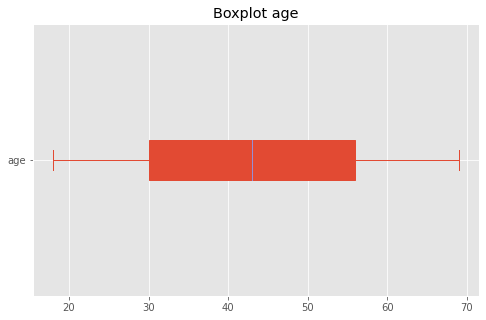

In [16]:
box_plot(
    df=shopping_data['age'],
    title='Boxplot age',
    savefig=True)

In [17]:
shopping_data['age'].min()

18

## Detección de outliers con el algoritmo LOF

In [18]:
lof = LocalOutlierFactor(
    n_neighbors=3, 
    algorithm='auto', 
    contamination='auto', 
    metric='euclidean')

In [19]:
lof_array = lof.fit_predict(numeric_scale)

In [20]:
ground_truth = np.ones(len(numeric_scale), dtype=int)

In [21]:
n_errors = (lof_array != ground_truth).sum()

In [22]:
n_errors

0

Bajo el algoritmo LOF no se encontraron datos atípicos por lo que no hay necesidad de realizar imputación de datos.

# Análisis estadístico

In [23]:
cols = ['gender', 'payment_method', 'shopping_mall']
shopping_categorical = shopping_categorical[cols]

## Variables categóricas

### Tablas de contingencia

Una tabla de contingencia, es una herramienta estadística que se utiliza para resumir y analizar la relación entre dos o más variables categóricas. En una tabla de contingencia, se registran las frecuencias conjuntas de las categorías de las variables categóricas, lo que permite visualizar y analizar patrones de asociación o independencia entre ellas.

In [24]:
gender_payment = pd.crosstab(
    index=shopping_categorical['gender'],
    columns=shopping_categorical['payment_method'],
    margins=True,
    margins_name="Total")

gender_payment

payment_method,Cash,Credit Card,Debit Card,Total
gender,,,,
Female,26509,21011,11962,59482
Male,17938,13920,8117,39975
Total,44447,34931,20079,99457


In [25]:
gender_mall = pd.crosstab(
    index=shopping_categorical['gender'],
    columns=shopping_categorical['shopping_mall'],
    margins=True,
    margins_name="Total")

gender_mall

shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center,Total
gender,,,,,,,,,,,
Female,2940,2842,3016,5874,11906,11902,8941,6144,2949,2968,59482
Male,2051,1969,1931,3907,7917,8041,6070,4017,1965,2107,39975
Total,4991,4811,4947,9781,19823,19943,15011,10161,4914,5075,99457


In [26]:
payment_mall = pd.crosstab(
    index=shopping_categorical['payment_method'],
    columns=shopping_categorical['shopping_mall'],
    margins=True,
    margins_name="Total")

payment_mall

shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center,Total
payment_method,,,,,,,,,,,
Cash,2228,2114,2183,4436,8853,8894,6625,4559,2231,2324,44447
Credit Card,1779,1696,1750,3422,6916,7019,5347,3521,1721,1760,34931
Debit Card,984,1001,1014,1923,4054,4030,3039,2081,962,991,20079
Total,4991,4811,4947,9781,19823,19943,15011,10161,4914,5075,99457


### Test Chi-Cuadrado

El test de chi-cuadrado, es una prueba estadística que se utiliza para determinar si existe una asociación significativa entre dos variables categóricas en una tabla de contingencia. El objetivo principal del test de chi-cuadrado es evaluar si las dos variables son independientes o si existe una relación significativa entre ellas.

In [27]:
chi2, p, _, _ = chi2_contingency(gender_payment)

print('Estadístico Chi-cuadrado:', chi2)
print('Valor p:', p)

# Determina si rechazar o no la hipótesis nula
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print('Se rechaza la hipótesis nula:'
          'Hay una relación significativa entre gender y payment_method.')
else:
    print('No se rechaza la hipótesis nula:'
          'No hay evidencia suficiente para concluir una relación significativa.')

Estadístico Chi-cuadrado: 2.66502007287277
Valor p: 0.8495614219432935
No se rechaza la hipótesis nula:No hay evidencia suficiente para concluir una relación significativa.


Como el valor p (0.85) es mayor que un nivel de significancia predefinido (generalmente 0.05), no tenemos evidencia suficiente para concluir que hay una relación significativa entre el género y el método de pago.
En otras palabras, no podemos decir con confianza que el género de las personas está relacionado de manera significativa con el método de pago que eligen.

In [28]:
chi2, p, _, _ = chi2_contingency(gender_mall)

print('Estadístico Chi-cuadrado:', chi2)
print('Valor p:', p)

# Determina si rechazar o no la hipótesis nula
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print('Se rechaza la hipótesis nula:'
          'Hay una relación significativa entre gender y shopping_mall.')
else:
    print('No se rechaza la hipótesis nula:'
          'No hay evidencia suficiente para concluir una relación significativa.')

Estadístico Chi-cuadrado: 12.446589184688174
Valor p: 0.8998478278721687
No se rechaza la hipótesis nula:No hay evidencia suficiente para concluir una relación significativa.


In [29]:
chi2, p, _, _ = chi2_contingency(payment_mall)

print('Estadístico Chi-cuadrado:', chi2)
print('Valor p:', p)

# Determina si rechazar o no la hipótesis nula
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print('Se rechaza la hipótesis nula:'
          'Hay una relación significativa entre payment_method y shopping_mall.')
else:
    print('No se rechaza la hipótesis nula:'
          'No hay evidencia suficiente para concluir una relación significativa.')

Estadístico Chi-cuadrado: 14.086052029704614
Valor p: 0.9939709287574926
No se rechaza la hipótesis nula:No hay evidencia suficiente para concluir una relación significativa.


### Matriz de Información Mutua

La Matriz de Información Mutua (MIM), es una herramienta utilizada en el campo de la estadística y el análisis de datos para medir la relación o la dependencia entre dos o más variables aleatorias, especialmente en el contexto de variables discretas o categóricas. La Información Mutua (MI) es una medida que cuantifica la dependencia entre dos variables aleatorias al medir cuánta información proporciona una variable sobre la otra.

In [30]:
datos_array = shopping_categorical.values
features = np.arange(0, datos_array.shape[1])
MI = []

for d in features:
    for e in features:
        Tabla_Contingencia = pd.crosstab(datos_array[:,d], datos_array[:,e])
        mi = mutual_info_score(labels_true=None, labels_pred=None, contingency = Tabla_Contingencia)
        MI.append(mi)

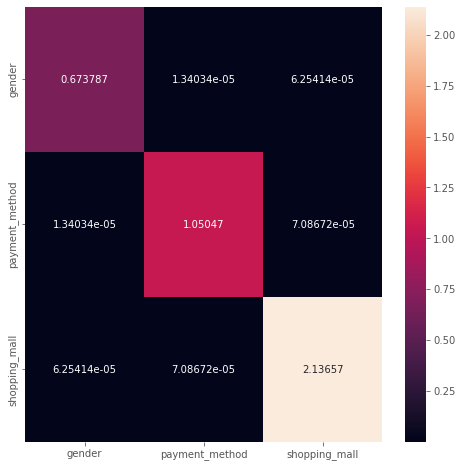

In [31]:
MI = np.asarray(MI)
MI = MI.reshape(datos_array.shape[1], datos_array.shape[1])

plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    MI, 
    annot=True, 
    fmt='g', 
    xticklabels = shopping_categorical.columns,
    yticklabels = shopping_categorical.columns)
plt.show()

Los valores de infomración mutua son muy pequeños por lo que podemos concluir que las variables categóricas no están relacionadas.

## Variables numéricas

### Coeficiente de Correlación de Pearson

In [32]:
r = []
valor_p = []

data = shopping_numeric.values
caracteristicas = shopping_numeric.columns
data = np.asarray(data)

for _, n in enumerate(np.arange(0, data.shape[1])):
    for _, m in enumerate(np.arange(0, data.shape[1])):
        r_valor, p_valor = pearsonr(data[:, n], data[:, m])
        r.append(r_valor)
        valor_p.append(p_valor)

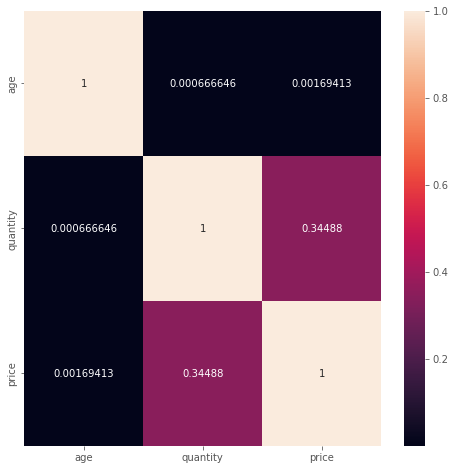

In [33]:
r = np.asarray(r)
valor_p = np.asarray(valor_p)

# Reshape de los arreglos para coincidir con las dimensiones de los datos originales
pearson_r = r.reshape(data.shape[1], data.shape[1])
p_value = valor_p.reshape(data.shape[1], data.shape[1])

# Creación de un gráfico de mapa de calor
plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    pearson_r, 
    annot=True, 
    fmt='g', 
    xticklabels=caracteristicas, 
    yticklabels=caracteristicas)

plt.show()

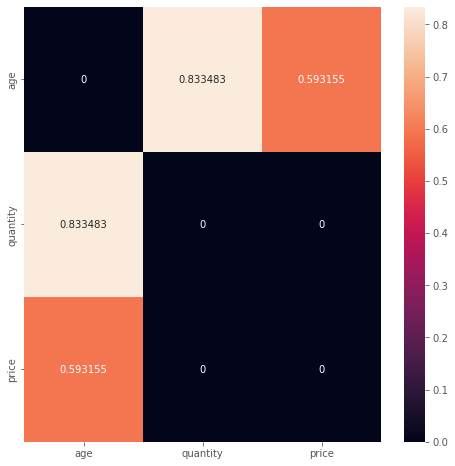

In [34]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    p_value, 
    annot=True, 
    fmt='g', 
    xticklabels=caracteristicas, 
    yticklabels=caracteristicas)

plt.show()

Si $ \rho <= 0.05 $, la correlación es estadísticamente significativo lo cual hay una relación lineal entre las dos características o variables.
Si $ \rho > 0.05 $, la correlación no es estadísticamente significativo lo cual no hay una correlación lineal significativa entre las dos características o variables.

Por lo tanto, $price$ y $quantity$ estan correlacionadas linealmente.

# Transformaciones

In [35]:
shopping_categorical_dummy = pd.get_dummies(shopping_categorical, drop_first=True)

In [36]:
shopping_categorical_dummy.head()

,gender_Male,payment_method_Credit Card,payment_method_Debit Card,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0


In [37]:
shopping_data['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

In [38]:
categories_shopping = shopping_data.groupby('category').agg({'customer_id': 'count'})

In [39]:
categories_shopping

,customer_id
category,
Books,4981
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Shoes,10034
Souvenir,4999
Technology,4996
Toys,10087


In [40]:
categories_shopping['per'] = categories_shopping['customer_id'] / categories_shopping['customer_id'].sum() * 100

In [41]:
categories_shopping = categories_shopping.sort_values(by='customer_id', ascending=False)

In [42]:
categories_shopping

,customer_id,per
category,,
Clothing,34487,34.675287
Cosmetics,15097,15.179424
Food & Beverage,14776,14.856672
Toys,10087,10.142071
Shoes,10034,10.088782
Souvenir,4999,5.026293
Technology,4996,5.023276
Books,4981,5.008194


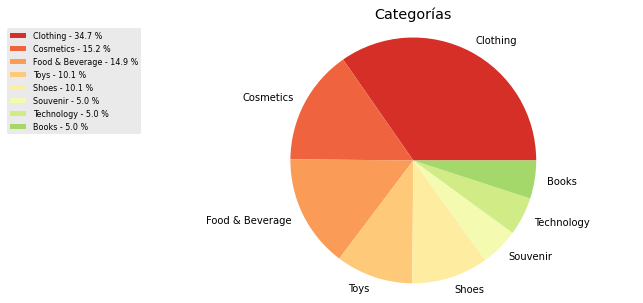

In [43]:
pie_plot(
    data=categories_shopping, 
    col='customer_id',
    title='Categorías',
    savefig=True)

## Agrupación de categorias de bajo porcentaje de participación

* Eliminar la columna Technology porque no aporta suficientes datos al modelo.

In [44]:
cond = shopping_data['category'] != 'Technology'
shopping_data = shopping_data[cond]

In [45]:
cats = ['Souvenir', 'Books']

for cat in cats:
    cond = shopping_data['category'] == cat
    shopping_data.loc[cond, 'category'] = 'Other'

In [46]:
categories_shopping = shopping_data.groupby('category').agg({'customer_id': 'count'})

In [47]:
categories_shopping

,customer_id
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Other,9980
Shoes,10034
Toys,10087


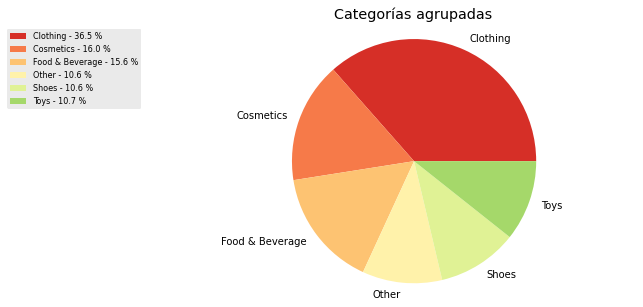

In [48]:
pie_plot(
    data=categories_shopping, 
    col='customer_id',
    title='Categorías agrupadas',
    savefig=True)

## Creación de nuevas columnas

In [49]:
shopping_data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [50]:
shopping_data.shape

(94461, 10)

In [51]:
shopping_categorical_dummy = shopping_categorical_dummy.iloc[shopping_data.index]

In [52]:
columns = ['age', 'category', 'price']

In [53]:
data_set = shopping_data[columns]

In [54]:
data_set = pd.concat([data_set, shopping_categorical_dummy], axis=1)

In [55]:
data_set.head()

,age,category,price,gender_Male,payment_method_Credit Card,payment_method_Debit Card,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
72972,19,Shoes,3000.85,0,0,1,0,0,0,0,0,1,0,0,0
81864,23,Shoes,3000.85,1,0,0,0,0,0,1,0,0,0,0,0
1296,69,Shoes,3000.85,1,0,0,0,1,0,0,0,0,0,0,0
31060,67,Shoes,3000.85,0,0,1,0,0,0,0,0,0,0,0,1
15731,42,Shoes,3000.85,1,1,0,1,0,0,0,0,0,0,0,0


In [56]:
path_save = os.path.join('data', 'customers_model.csv')
data_set.to_csv(path_save, index=False)